In [1]:
import numpy as np
import matplotlib.pyplot as plt

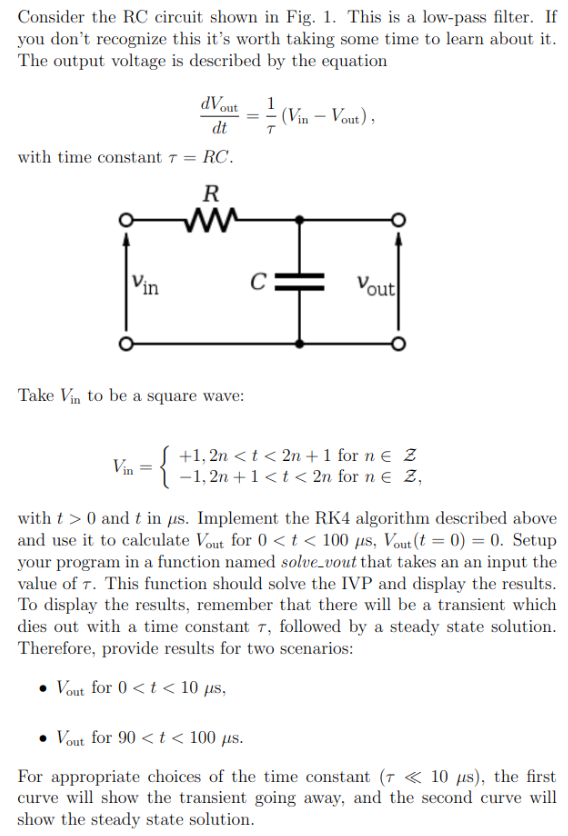

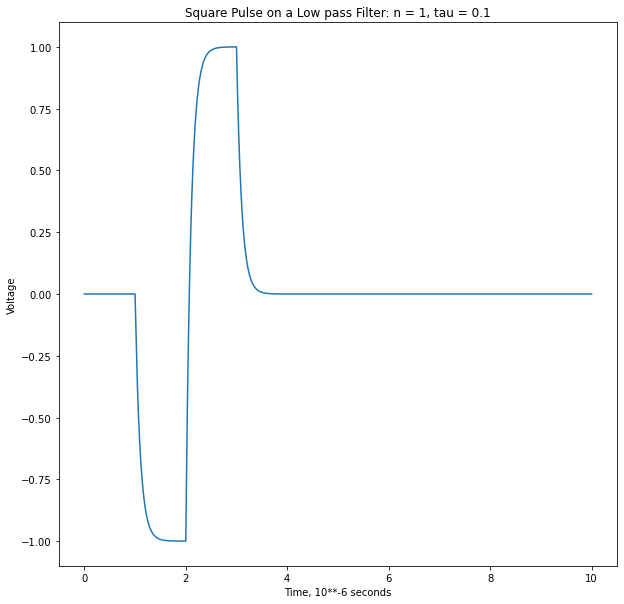

In [2]:
def solve_vout(tau):
    
    def RK4(step,tbounds,y0,diffeq):
        t0, tf = tbounds[0], tbounds[1]
        def yn_1(tn,yn):
            k1 = step*diffeq(tn,yn)
            k2 = step*diffeq(tn + 0.5*step, yn + 0.5*k1)
            k3 = step*diffeq(tn + 0.5*step, yn + 0.5*k2)
            k4 = step*diffeq(tn + step, yn + k3)
            return yn + (k1/6+k2/3+k3/3+k4/6)

        ts = np.arange(t0,tf+step,step)
        ys = []
        yn=y0
        for t in ts:
            ys.append(yn)
            yn1 = yn_1(t,yn)
            yn = yn1
        return ts,ys

    def DQ(t,Vout):
        n=1 #setting it to this for now
        def Vin(T):
            if T<2*n+1 and T>2*n:
                return 1
            elif T<2*n and T>2*n-1:
                return -1
            else:
                #print(T,'work?')
                return 0
        return (Vin(t)-Vout)/tau
    
    step_size = 0.001
    tbounds = (0,10) #t0, tf
    Vout_0 = 0
    t, Vouts = RK4(step_size,tbounds,Vout_0,DQ)
    plt.figure(figsize=(10,10))
    plt.plot(t,Vouts)
    plt.ylabel('Voltage')
    plt.xlabel('Time, 10**-6 seconds')
    plt.title(f'Square Pulse on a Low pass Filter: n = {1}, tau = {tau}')
    return

solve_vout(0.10)